<a href="https://colab.research.google.com/github/ErrQD0303/MachineLearning/blob/main/GAT_with_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

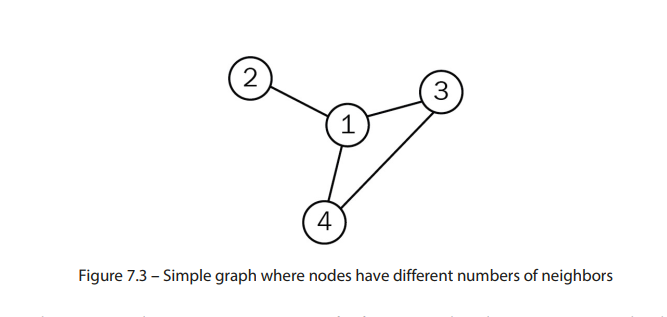

In [ ]:
import numpy as np
np.random.seed(0)

# 1. Chuẩn bị dữ liệu
# Xây dựng ma trận liền kề A với self-loops (vòng lặp quay ngược về nút chủ)
A = np.array([
            [1, 1, 1, 1],
            [1, 1, 0, 0],
            [1, 0, 1, 1],
            [1, 0, 1, 1]
])

In [ ]:
# Xây dựng đặc tính nút X bằng cách tạo ra một ma trận ngẫu nhiên của các đặc tính nút sử dụng np.random.uniform()
X = np.random.uniform(-1, 1, (4, 4))

In [ ]:
# 2. Định nghĩa các ma trận khối lượng
# Syntax: np.random.uniform(-1, 1, (<nb of hidden dimensions>, <nb of nodes>))
W = np.random.uniform(-1, 1, (2, 4))

In [ ]:
# 3. Áp dụng ma trận chú ý vào phép nối các vector ẩn để sinh ra giá trị độc nhất. Vậy nên kích thước nó phải là (1, số chiều_h x 2)
# dim_h = 2 x 2 = 4
W_att = np.random.uniform(-1, 1, (1, 4))

In [ ]:
# 4. Lưu trữ cặp nút nguồn và đích
connections = np.where(A > 0)

In [ ]:
# 5. Nối các vector nguồn và đích ẩn
np.concatenate([(X @ W.T)[connections[0]], (X @ W.T)[connections[1]]], axis=1)

array([[-0.02086364, -0.11673572, -0.02086364, -0.11673572],
       [-0.02086364, -0.11673572,  0.98410064,  0.43205504],
       [-0.02086364, -0.11673572, -1.13798007, -0.16273574],
       [-0.02086364, -0.11673572,  0.01189352, -0.18823534],
       [ 0.98410064,  0.43205504, -0.02086364, -0.11673572],
       [ 0.98410064,  0.43205504,  0.98410064,  0.43205504],
       [-1.13798007, -0.16273574, -0.02086364, -0.11673572],
       [-1.13798007, -0.16273574, -1.13798007, -0.16273574],
       [-1.13798007, -0.16273574,  0.01189352, -0.18823534],
       [ 0.01189352, -0.18823534, -0.02086364, -0.11673572],
       [ 0.01189352, -0.18823534, -1.13798007, -0.16273574],
       [ 0.01189352, -0.18823534,  0.01189352, -0.18823534]])

In [ ]:
# 6. Áp dụng bước đầu tiên là biến đổi tuyến tính cho kết quả nhận được với ma trận chú ý W_att
a = W_att @ np.concatenate([(X @ W.T)[connections[0]], (X @ W.T)[connections[1]]], axis=1).T

In [ ]:
# 7. Áp dụng hàm Leaky ReLU vào a
def leaky_relu(x, alpha=0.2):
  return np.maximum(alpha*x, x)

e = leaky_relu(a)

In [ ]:
# 8. Xây dựng ma trận bằng kích thước của ma trận A và đặt các giá trị vào vị trí thích hợp
E = np.zeros(A.shape)
E[connections[0], connections[1]] = e[0]

In [ ]:
# 9. Chuẩn hóa bằng softmax để tạo ra attention scores cuối cùng
def softmax2D(x, axis):
  e = np.exp(x - np.expand_dims(np.max(x, axis=axis), axis))
  sum = np.expand_dims(np.sum(e, axis=axis), axis)
  return e / sum

W_apha = softmax2D(E, 1)

In [ ]:
# 10. Tính toán ma trận nhúng H
H = A.T @ W_apha @ X @ W.T

In [ ]:
print(H)

[[-1.30544452 -0.2171046 ]
 [-0.50910279 -0.09775764]
 [-1.22187839 -0.18996117]
 [-1.22187839 -0.18996117]]
